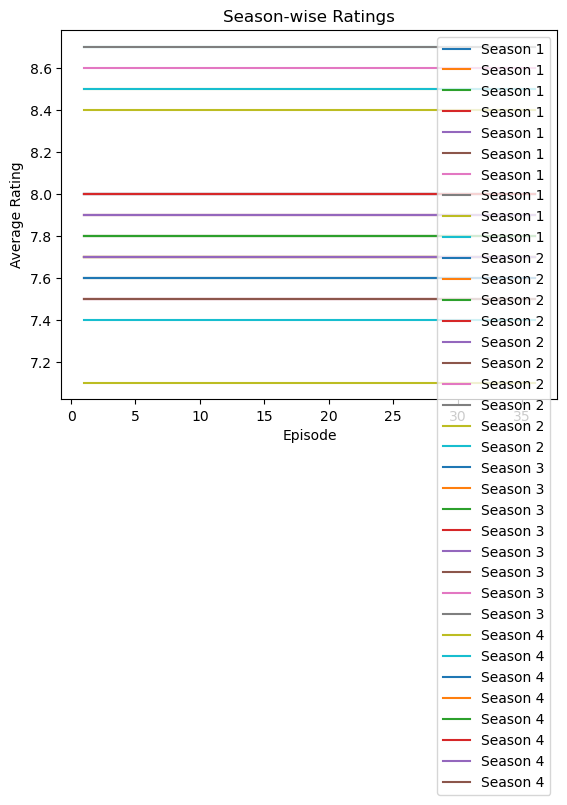

Season Ratings:
Season 1 Rating
Season 2 Rating
Season 3 Rating
Season 4 Rating

High Rated Episodes:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Kiksuya
Vanishing Point
The Passenger

Episodes Aired Before May 2019:
The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger

Episodes with Highest and Lowest Ratings:
Season 1:
Highest Rated Episode: The Bicameral Mind - Rating: 8.7
Lowest Rated Episode: The Stray - Rating: 7.6
Season 2:
Highest Rated Episode: Kiksuya - Rating: 8.7
Lowest Rated Episode: Akane No Mai - Rating: 7.6
Season 3:
Highest Rated Episode: Parce Domine - Rating: 8
Lowest Rated Episode: Decoherence - Rating: 7.5
Season 4:
Highest Rated Episode: Zhuangzi - Rating: 7.8
Lowest Rated Episode: The Auguries - Rating: 7.1

Popula

In [2]:
import requests
import matplotlib.pyplot as plt

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API and retrieve the data
response = requests.get(api_link)
data = response.json()

# Extracting episode data
episodes = data['_embedded']['episodes']

# Initialize empty lists to store data for analysis
season_ratings = []
high_rated_episodes = []
early_episodes = []
high_low_ratings = {}
popular_episodes = {}

# Iterate over each episode and extract the desired attributes
for episode in episodes:
    episode_season = episode['season']
    episode_average_rating = episode['rating']['average']
    episode_name = episode['name']
    episode_airdate = episode['airdate']
    episode_summary = episode['summary']

    # Collect overall ratings for each season
    if episode_season not in season_ratings:
        season_ratings.append(episode_season)

    # Compare ratings for all seasons
    if episode_average_rating:
        season_rating_data = [episode_average_rating] * len(episodes)
        plt.plot(range(1, len(episodes) + 1), season_rating_data, label=f"Season {episode_season}")

    # Collect episode names with average rating more than 8 for every season
    if episode_average_rating and episode_average_rating > 8:
        high_rated_episodes.append(episode_name)

    # Collect episode names that aired before May 2019
    if episode_airdate and episode_airdate < '2019-05':
        early_episodes.append(episode_name)

    # Collect episode with highest and lowest rating for each season
    if episode_season not in high_low_ratings:
        high_low_ratings[episode_season] = {'highest': {'rating': 0, 'name': ''}, 'lowest': {'rating': 10, 'name': ''}}
    
    if episode_average_rating:
        if episode_average_rating > high_low_ratings[episode_season]['highest']['rating']:
            high_low_ratings[episode_season]['highest']['rating'] = episode_average_rating
            high_low_ratings[episode_season]['highest']['name'] = episode_name
        if episode_average_rating < high_low_ratings[episode_season]['lowest']['rating']:
            high_low_ratings[episode_season]['lowest']['rating'] = episode_average_rating
            high_low_ratings[episode_season]['lowest']['name'] = episode_name

    # Collect summary for the most popular (highest-rated) episode in every season
    if episode_season not in popular_episodes:
        popular_episodes[episode_season] = {'rating': 0, 'summary': '', 'name': ''}
    
    if episode_average_rating:
        if episode_average_rating > popular_episodes[episode_season]['rating']:
            popular_episodes[episode_season]['rating'] = episode_average_rating
            popular_episodes[episode_season]['summary'] = episode_summary
            popular_episodes[episode_season]['name'] = episode_name

# Plot configuration
plt.xlabel('Episode')
plt.ylabel('Average Rating')
plt.title('Season-wise Ratings')
plt.legend()
plt.show()

# Print the results
print("Season Ratings:")
for season in season_ratings:
    print(f"Season {season} Rating")

print("\nHigh Rated Episodes:")
for episode in high_rated_episodes:
    print(episode)

print("\nEpisodes Aired Before May 2019:")
for episode in early_episodes:
    print(episode)

print("\nEpisodes with Highest and Lowest Ratings:")
for season, ratings in high_low_ratings.items():
    print(f"Season {season}:")
    print(f"Highest Rated Episode: {ratings['highest']['name']} - Rating: {ratings['highest']['rating']}")
    print(f"Lowest Rated Episode: {ratings['lowest']['name']} - Rating: {ratings['lowest']['rating']}")

print("\nPopular Episodes Summary:")
for season, episode_info in popular_episodes.items():
    print(f"Season {season}:")
    print(f"Most Popular Episode: {episode_info['name']}")
    print(f"Summary: {episode_info['summary']}")
